Employees  who left the job can be classfied in two types.

**Highly Qualifed For Job : High Evaluation**
* satisifed with the job
*  works more number of hours
*  high evaluation
* stayed at the firm for a long time(3-4 years)

**OR**
*   Not satisfied
*  left very early(< 1 years)


**Qualifed: Average Evaluation**
*  Not satisfied with job
* left in 2-2.5.years 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
plt.style.use('fivethirtyeight')
from subprocess import check_output
data = pd.read_csv('HR_comma_sep.csv')
print(data.columns)
lbl=LabelEncoder()
data.sales=lbl.fit_transform(data.sales)
%matplotlib inline

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


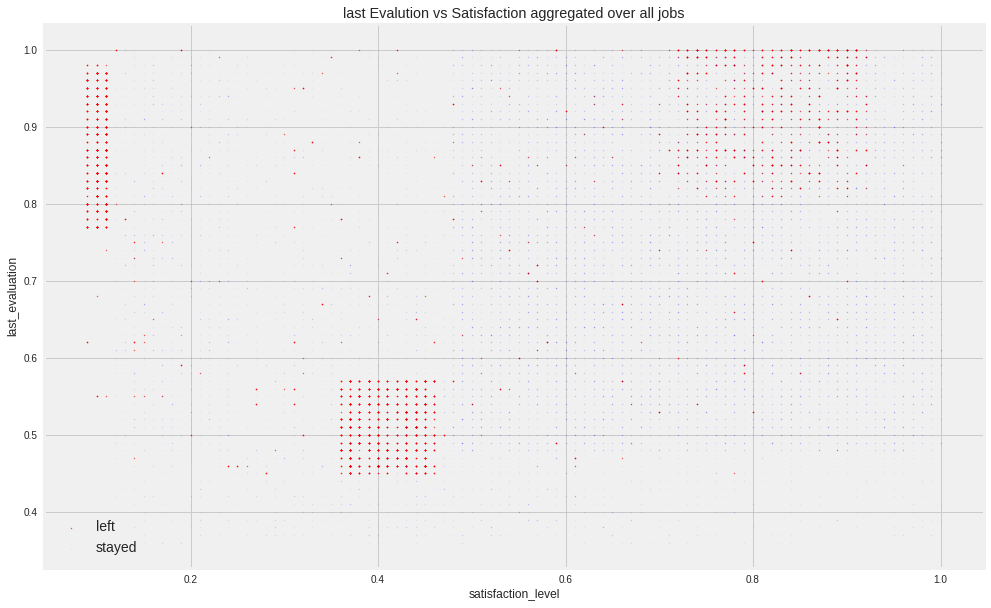

In [20]:
x='satisfaction_level'
y='last_evaluation'
leave=1
plt.figure(figsize=(15,10))
scatter1=plt.scatter(data[x][data.left == leave],data[y][data.left == leave],s=1.0, c='r', marker='o',alpha = 0.5)
plt.xlabel(x)
plt.ylabel(y)
leave=0
scatter2=plt.scatter(data[x][data.left == leave],data[y][data.left == leave],s=1.0, c='b', marker='o',alpha = 0.03)
legnd=plt.legend([scatter1,scatter2],['left','stayed'],fontsize=14)
plt.title('last Evalution vs Satisfaction aggregated over all jobs')
# Red means left | blue means stayed


3 cluster describe the average, Experienced and over Qualified employees

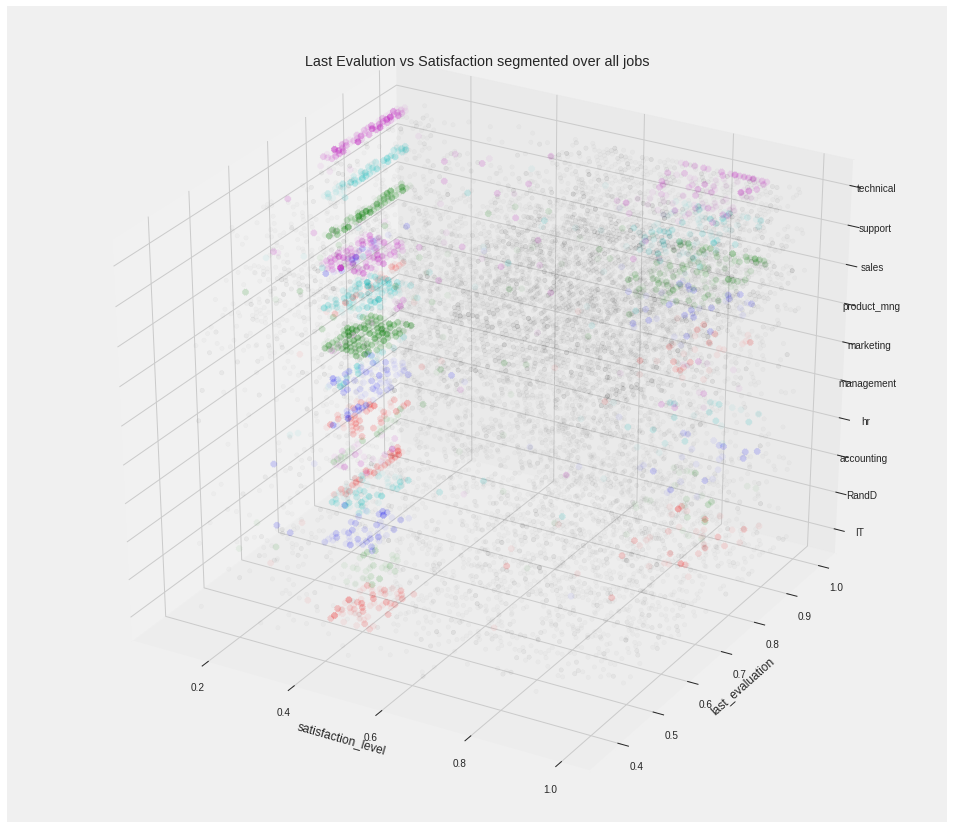

In [8]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
x='satisfaction_level' 
y='last_evaluation'
z='sales'
colorrole='rgbcmrbgcmrgbcmrbgcm'
ax.set_xlabel(x)
ax.set_ylabel(y)
#ax.set_zlabel(z)
ax.set_zticklabels(lbl.inverse_transform(np.arange(10)))
ax.set_zticks(np.arange(10))
ax.set_title('Last Evalution vs Satisfaction segmented over all jobs')
for role in data.sales.unique():
    roleData=data[data.sales==role]
    leave=0
    ax.scatter(roleData[x][roleData.left == leave],roleData[y][data.left == leave],roleData[z][roleData.left == leave], c='k', marker='o',alpha = 0.02)
    leave=1
    ax.scatter(roleData[x][roleData.left == leave],roleData[y][roleData.left == leave],roleData[z][roleData.left == leave], c=colorrole[role], marker='x',alpha = 0.05)
#colored points means left | grey points means stayed


The same 3 pathches  in this plot as well.however they vary in density accoss various jobs

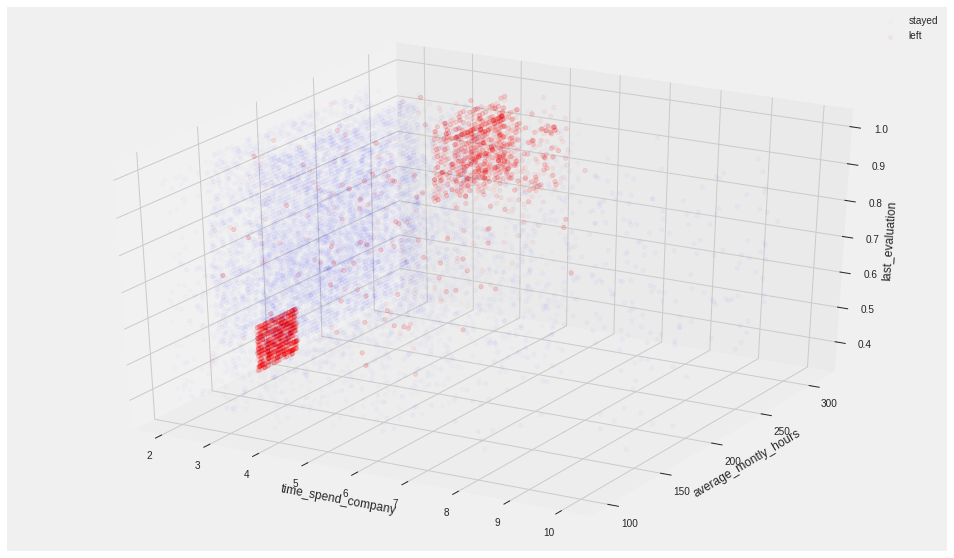

In [4]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
x='time_spend_company'
y='average_montly_hours'
z='last_evaluation'

leave=0
scatter1=ax.scatter(data[x][data.left == leave],data[y][data.left == leave],data[z][data.left == leave], c='b', marker='o',alpha = 0.01)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
leave=1
scatter2=ax.scatter(data[x][data.left == leave],data[y][data.left == leave],data[z][data.left == leave], c='r', marker='o',alpha = 0.05)
ax.legend([scatter1, scatter2], ['stayed', 'left'], numpoints = 1)
#Red means left employees | blue are employees that stayed

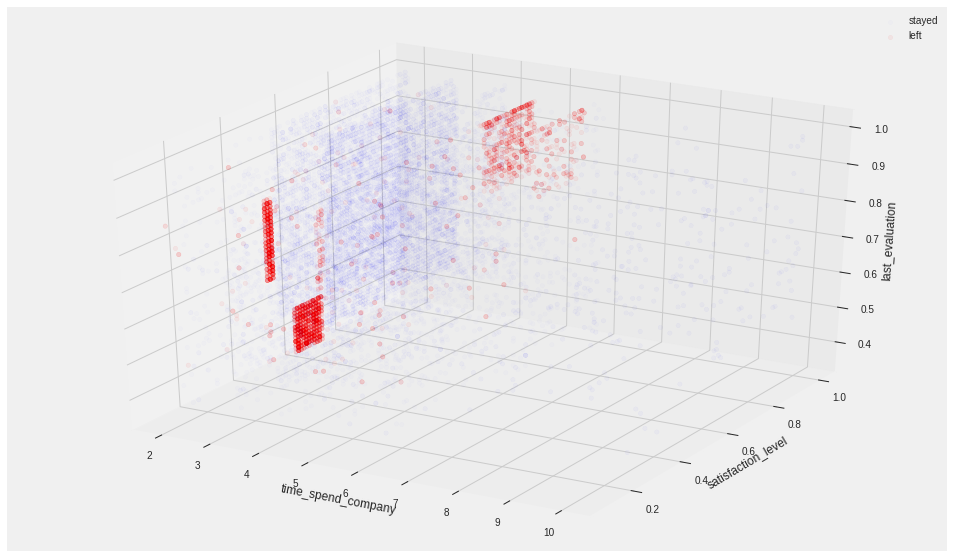

In [21]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
x='time_spend_company'
y='satisfaction_level'
z='last_evaluation'

leave=0
scatter1=ax.scatter(data[x][data.left == leave],data[y][data.left == leave],data[z][data.left == leave], c='b', marker='o',alpha = 0.01)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
leave=1
scatter2=ax.scatter(data[x][data.left == leave],data[y][data.left == leave],data[z][data.left == leave], c='r', marker='o',alpha = 0.05)
ax.legend([scatter1, scatter2], ['stayed', 'left'], numpoints = 1)
#Red means left employees | blue are employees that stayed

Those who had high evaluation has worked for more than 3 years,
Those with average evalaution had quit the job in 2-2.5 years

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
data_df = pd.read_csv("HR_comma_sep.csv", encoding="ISO-8859-1")
data_df.head()
balanced=data_df[data_df.left==1]
balanced=balanced.append(data_df[data_df.left==0].iloc[0:3571])

/home/163190012/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


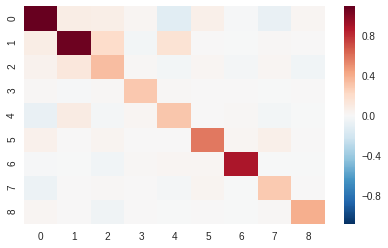

In [16]:
import numpy as np
from metric_learn import LMNN
from sklearn import preprocessing
leSales = preprocessing.LabelEncoder() 
leSalary= preprocessing.LabelEncoder() 
le=preprocessing.LabelEncoder() 
index=np.arange(0,7142,5)

train_data1=balanced.iloc[index]

#train_data1=train_data1[np.arange(0,589*2,5)]
train_data1.sales=leSales.fit_transform(train_data1.sales)
train_data1.salary=leSalary.fit_transform(train_data1.salary)
train_data1.left=le.fit_transform(train_data1.left)
# for i in xticks:
#     train_data1[(i+"2")]=(train_data1[i]**2)*5/max(train_data1[i]**2)

#X=train_data1.drop(['left'],axis=1).values

#X = train_data1.drop('sales',axis=1,inplace=True)
X = train_data1.drop('left',axis=1).values
Y =  (train_data1['left'].values)
lmnn = LMNN(k=5, learn_rate=1e-6,max_iter=100,verbose=False)
lmnn.fit(X, Y)

sns.heatmap(lmnn.transformer())

In [17]:
import sklearn
from scipy.spatial.distance import mahalanobis

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

def d(u,v):
    return mahalanobis(u, v,lmnn.transformer())


knn=KNeighborsClassifier(n_neighbors=4,
                 algorithm='auto',
                 metric=lambda a,b: d(a,b)
                 )
#X=pd.DataFrame({'b':[0,3,2],'c':[1.0,4.3,2.2]})

index=np.arange(0,7140,5)
train_data1=balanced.iloc[index]

#train_data1=train_data1[np.arange(0,589*2,5)]
train_data1.sales=leSales.fit_transform(train_data1.sales)
train_data1.salary=leSalary.fit_transform(train_data1.salary)
# for i in xticks:
#     train_data1[(i+"2")]=(train_data1[i]**2)*5/max(train_data1[i]**2)

#X=train_data1.drop(['left'],axis=1).values

#X = train_data1.drop('sales',axis=1,inplace=True)
X = train_data1.drop('left',axis=1).values
Y =  le.transform((train_data1['left'].values))

knn.fit(X,Y)
y_pred=knn.predict(X)

print("train acc",accuracy_score(Y,y_pred))

index=np.arange(1,7142,5)
test_data1=balanced.iloc[index]
test_data1.sales=leSales.transform(test_data1.sales)
test_data1.salary=leSalary.transform(test_data1.salary)
X = test_data1.drop('left',axis=1).values
Y =  le.transform((test_data1['left'].values))

y_pred=knn.predict(X)
print("test acc",accuracy_score(Y,y_pred))

index=np.arange(2,7142,5)
test_data1=balanced.iloc[index]
test_data1.sales=leSales.transform(test_data1.sales)
test_data1.salary=leSalary.transform(test_data1.salary)
X = test_data1.drop('left',axis=1).values
Y =  le.transform((test_data1['left'].values))

y_pred=knn.predict(X)
print("test acc",accuracy_score(Y,y_pred))


index=np.arange(3,7142,5)
test_data1=balanced.iloc[index]
test_data1.sales=leSales.transform(test_data1.sales)
test_data1.salary=leSalary.transform(test_data1.salary)
X = test_data1.drop('left',axis=1).values
Y =  le.transform((test_data1['left'].values))

y_pred=knn.predict(X)
print("test acc",accuracy_score(Y,y_pred))


index=np.arange(4,7142,5)
test_data1=balanced.iloc[index]
test_data1.sales=leSales.transform(test_data1.sales)
test_data1.salary=leSalary.transform(test_data1.salary)
X = test_data1.drop('left',axis=1).values
Y =  le.transform((test_data1['left'].values))

y_pred=knn.predict(X)
print("test acc",accuracy_score(Y,y_pred))



#train acc 0.920168067227
#test acc 0.860041987404
#test acc 0.892857142857
#test acc 0.885854341737
#test acc 0.866246498599

/home/163190012/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


train acc 0.920868347339
test acc 0.862841147656
test acc 0.895658263305
test acc 0.891456582633
test acc 0.870448179272
